In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
confirmed_global = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_global = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_global = pd.read_csv('time_series_covid19_recovered_global.csv')

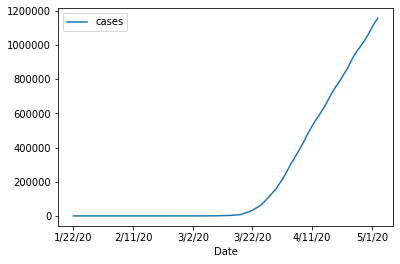

In [3]:
us = confirmed_global[confirmed_global['Country/Region'] == 'US']
us = us.drop(['Province/State', 'Lat', 'Long', 'Country/Region'], axis = 1)
us = us.reset_index(drop=True).T
us.columns = ['cases']
us.index.names =['Date']
us['Date'] = us.index
us.index = range(len(us))
us.plot.line(x='Date', y='cases')

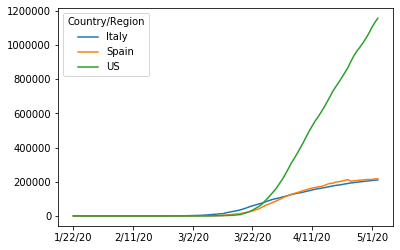

In [19]:
others = confirmed_global[confirmed_global['Country/Region'] .isin (['Spain', 'US', 'Italy'])]
others = others.drop(['Province/State', 'Lat', 'Long'], axis = 1)
others = others.reset_index(drop=True).T
others.columns= others.iloc[0]
others.drop(['Country/Region'], inplace=True)
# others.index.names = ['date']
others.plot()
# us.columns = ['cases']
# us.index.names =['Date']
# us['Date'] = us.index
# us.index = range(len(us))
# us.plot.line(x='Date', y='cases')

In [3]:
population = pd.read_csv('population_csv.txt')
pop = pd.DataFrame(population)
pop[pop['Year'] == 2018 ]

,Country Name,Country Code,Year,Value
58,Arab World,ARB,2018,419790588
117,Caribbean small states,CSS,2018,7358965
176,Central Europe and the Baltics,CEB,2018,102511922
235,Early-demographic dividend,EAR,2018,3249140605
294,East Asia & Pacific,EAS,2018,2328220870
...,...,...,...,...
15202,Virgin Islands (U.S.),VIR,2018,106977
15231,West Bank and Gaza,PSE,2018,4569087
15290,"Yemen, Rep.",YEM,2018,28498687
15349,Zambia,ZMB,2018,17351822


In [4]:
columns = ['Province/State', 'Country/Region', '4/19/20']
total_recovered = pd.DataFrame(recovered_global, columns=columns)
total_deaths = pd.DataFrame(deaths_global, columns=columns)
total_confirmed = pd.DataFrame(confirmed_global, columns=columns)

In [5]:
rec_col_mapping = {'4/19/20' : 'Recoveries'}
dea_col_mapping = {'4/19/20' : 'Deaths'}
confir_col_mapping = {'4/19/20' : 'Confirmed'}
total_recovered = total_recovered.rename(columns=rec_col_mapping, copy=False)
total_deaths = total_deaths.rename(columns=dea_col_mapping, copy=False)
total_confirmed = total_confirmed.rename(columns=confir_col_mapping, copy=False)
total_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Province/State  67 non-null     object
 1   Country/Region  250 non-null    object
 2   Recoveries      250 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.0+ KB


In [6]:
covid_updates = pd.merge(pd.merge(total_confirmed, total_recovered), total_deaths)
#covid_updates.iloc[162]#nigeria
covid_updates.head()

,Province/State,Country/Region,Confirmed,Recoveries,Deaths
0,NaN,Afghanistan,996,131,33
1,NaN,Albania,562,314,26
2,NaN,Algeria,2629,1047,375
3,NaN,Andorra,713,235,36
4,NaN,Angola,24,6,2


In [6]:
#all_names = pd.Series(top1000.name.unique())
#all_countries = pd.Series(covid_updates['Province/State'].dropna().unique())
#all_countries = pd.Series(covid_updates['Country/Region'].unique())
#all_countries
#covid_updates.loc[95:106]
#no_multiple_countries.loc[55:65]

In [7]:
no_multiple_countries = covid_updates.groupby('Country/Region', as_index=False).sum()
no_multiple_countries.head()

,Country/Region,Confirmed,Recoveries,Deaths
0,Afghanistan,996,131,33
1,Albania,562,314,26
2,Algeria,2629,1047,375
3,Andorra,713,235,36
4,Angola,24,6,2


In [8]:
highest_cases = no_multiple_countries.sort_values(by='Confirmed', ascending=False)
highest_cases = highest_cases.reset_index(drop=True)

In [9]:
#time to see a country's percentages in relation to total world wide cases
total_cases = highest_cases['Confirmed'].sum()
highest_cases['Percentage'] = (highest_cases['Confirmed'] / total_cases) * 100
columns = ['Country/Region', 'Confirmed', 'Percentage']
percentage_share = pd.DataFrame(highest_cases, columns=columns)
percentage_share[:20]

,Country/Region,Confirmed,Percentage
0,US,759086,32.086538
1,Spain,198674,8.397943
2,Italy,178972,7.565140
3,France,154097,6.513675
4,Germany,145184,6.136923
5,United Kingdom,121172,5.121936
6,Turkey,86306,3.648152
7,China,83805,3.542434
8,Iran,82211,3.475056
9,Russia,42853,1.811395


In [10]:
#now to get each country's death rate
with_death_rate = no_multiple_countries
with_death_rate['Death Rate'] = (no_multiple_countries['Deaths'] / no_multiple_countries['Confirmed']) * 100
columns = ['Country/Region', 'Confirmed', 'Deaths', 'Death Rate']
with_death_rate = pd.DataFrame(with_death_rate, columns=columns).sort_values(by='Death Rate', ascending=False).reset_index(drop=True)
with_death_rate[with_death_rate['Confirmed'] > 2000].reset_index(drop=True)[:10]

,Country/Region,Confirmed,Deaths,Death Rate
0,Belgium,38496,5683,14.762573
1,Algeria,2629,375,14.263979
2,United Kingdom,121172,16095,13.282772
3,Italy,178972,23660,13.219945
4,France,154097,19744,12.812709
5,Netherlands,32838,3697,11.258298
6,Sweden,14385,1540,10.705596
7,Spain,198674,20453,10.294754
8,Indonesia,6575,582,8.851711
9,Mexico,7497,650,8.670135


In [11]:
with_death_rate[with_death_rate['Country/Region'].isin(['US', 'Russia', 'Armenia', 'Azerbaijan', 'Estonia', 'Ukraine', 'Germany'])]

,Country/Region,Confirmed,Deaths,Death Rate
43,US,759086,40661,5.356574
81,Germany,145184,4586,3.158750
94,Estonia,1528,40,2.617801
95,Ukraine,5449,141,2.587631
118,Armenia,1291,20,1.549187
120,Azerbaijan,1398,19,1.359084
135,Russia,42853,361,0.842415
